# PROJECT TITLE:ONGOZA DATASET
The provided ongoza data is to develop a model that can predictstartup business in different variables, 
and then interpret the results to find the variables that are most predictive of the variables.
This is a supervised, regression machine learning task but to be precise have used decision tree in training my model because i wanted the model to learn to map the features(also known as the explanatory variables) to the target.

### THE MACHINE LEARNING WORKFLOW

Below is the general outline of the machine learning pipeline to structure my project;-
    1.Data cleaning and formatting.
    2.Exploratory data analysis.
    3.Feature engineering and selection'
    4.Performance metric & tuning on the model to optimize it for the problem its solving.
    6.Evaluate the model on the testing set
    7.Deployment of the model.


### Import the libraries
We will use the standard data science and machine learning libraries: 
numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [48]:
# Data Preprocessing 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Cleaning and Formatting
Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize.

In [49]:
# Import the dataset
dataset = pd.read_csv('ongoza-data.csv')

# Data Types and Missing Values

The (dataframe.info) method is a quick way to assess the data 
by displaying the data types of each column and the number of non-missing values

In [50]:
# Explore the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 38 columns):
application_year             1856 non-null int64
selected                     1034 non-null float64
showup                       1021 non-null float64
finished                     1828 non-null float64
info_venture_country         1856 non-null object
info_venture_country_hq      1856 non-null object
venture region               1856 non-null object
info_has_website             1856 non-null int64
info_founding_year           1848 non-null float64
info_legal_status            1856 non-null object
info_sector                  1842 non-null object
info_financial_goals         1856 non-null object
fins_revenues_m1             1856 non-null float64
fins_revenues_sincefound     1856 non-null float64
fins_profit_m1               1793 non-null object
fins_ft_employees_m1         1856 non-null int64
fins_pt_employees_m1         1856 non-null int64
found_name1_present          1855 non-nul

In [51]:
dataset.describe()

,application_year,selected,showup,finished,info_has_website,info_founding_year,fins_revenues_m1,fins_revenues_sincefound,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age
count,1856.000000,1034.000000,1021.000000,1828.000000,1856.000000,1848.000000,1.856000e+03,1.856000e+03,1856.000000,1856.000000,1855.000000,1855.000000,1855.000000,1705.000000,1815.000000,1469.000000,845.000000,1815.000000
mean,2015.399784,0.197292,0.180215,0.237418,0.714978,2011.885823,1.475077e+05,2.157293e+06,7.574353,6.404634,0.997844,0.809704,0.469003,1.029912,35.689807,36.042886,35.489941,35.862534
std,0.757126,0.398147,0.384555,0.425617,0.451546,4.086299,7.236814e+05,4.414106e+07,19.228429,24.976270,0.046399,0.392641,0.499173,5.029577,9.869444,11.505664,11.997293,8.934388
min,2014.000000,0.000000,0.000000,0.000000,0.000000,1965.000000,1.000000e-01,8.600000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,1.000000,1.000000,19.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,4.000000e+03,7.000000e+03,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.000000,28.000000,27.000000,29.333333
50%,2016.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.740000e+04,4.000000e+04,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,33.000000,33.000000,32.000000,34.000000
75%,2016.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,7.468725e+04,1.913366e+05,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,40.000000,42.000000,41.000000,41.333333
max,2016.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.853536e+07,1.659025e+09,400.000000,500.000000,1.000000,1.000000,1.000000,150.000000,85.000000,82.000000,78.000000,85.000000


In [52]:
# Select variables to work with
dataset = dataset.loc[:, ['selected', 
                          'application_year',
                          'showup', 
                          'finished',
                          'venture region',
                          'info_has_website',
                          'info_founding_year',
                          'Average Team Age']]

In [53]:
#removing null values based on on the selected columns
dataset = dataset[dataset.selected.notna()]

In [54]:
dataset.head()

,selected,application_year,showup,finished,venture region,info_has_website,info_founding_year,Average Team Age
0,1.0,2016,1.0,1.0,Sub-Saharan Africa,1,2015.0,19.000000
3,0.0,2016,NaN,NaN,Latin America & Caribbean,0,2015.0,20.666667
4,0.0,2016,0.0,0.0,Sub-Saharan Africa,0,2015.0,20.666667
5,0.0,2016,0.0,0.0,Sub-Saharan Africa,1,2015.0,21.000000
11,0.0,2016,0.0,0.0,Sub-Saharan Africa,0,2015.0,21.333333


# Exploratory Data Analysis
is an open-ended process where we make plots 
and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables)
or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. In our case will focus on target variables i.e selected,finished,showed up for our machine learning model.


In [55]:
# first is the descriptive analysis

In [56]:
dataset["Average Team Age"].max()

85.0

In [57]:
dataset["Average Team Age"].min()

19.0

#### The venture region which had the largest no. of participants in all categories was latin America & caribean

In [58]:
dataset.groupby(dataset["venture region"])[["selected", "showup", "finished"]].count()

,selected,showup,finished
venture region,,,
East Asia & Pacific,22,22,22
Europe & Central Asia,18,18,18
Latin America & Caribbean,277,266,268
Middle East & North Africa,1,1,1
North America,115,114,114
South Asia,89,88,88
Sub-Saharan Africa,512,512,512


In [59]:
dataset.groupby((dataset)[["selected", "showup", "finished"]].count())

# Data visualization

In [60]:
import seaborn as sns
import matplotlib as plt
sns.set(style="darkgrid")

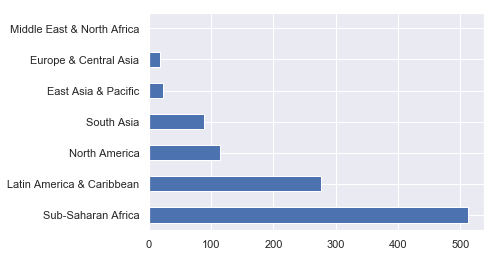

In [61]:
dataset["venture region"].value_counts().plot(kind="barh")

Sub-saharan Africa had the largest number of clients who ventured in the business.

Categorical data is data that is collected in groups or topics; the number of events in each group is counted numerically.
conversion of categorical data to numerical or factor into (o's,1's)

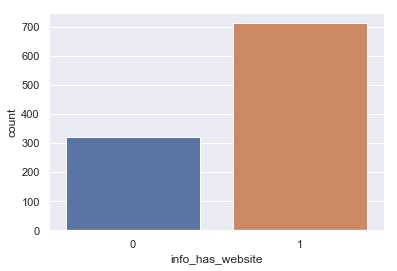

In [62]:
sns.countplot(x="info_has_website", data=dataset, palette="deep")

The above shows that most of the business who registered had website which indicates they were ready to embrace the new market they ventured in the different region.

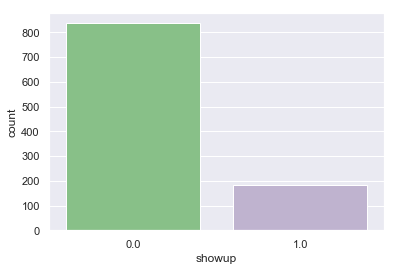

In [63]:
sns.countplot(x="showup", data=dataset, palette="Accent")

800 showup and 200 showup

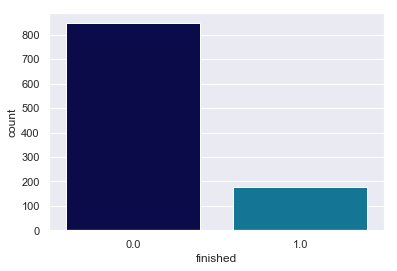

In [64]:
sns.countplot(x="finished", data=dataset, palette="ocean")

the above shows that despite many business venturing in the market not many were able to finish(800) like sustain themselves in the competitive market only (200).

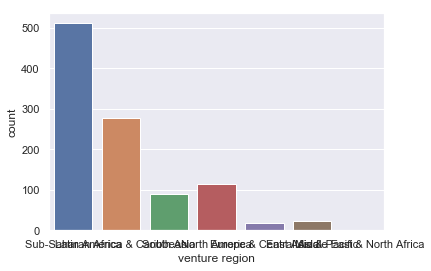

In [65]:
sns.countplot(x="venture region", data=dataset)

the above show the venture region (Sub-Saharan Africa) with the highest count of businesses.

C:\Users\faimu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\faimu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


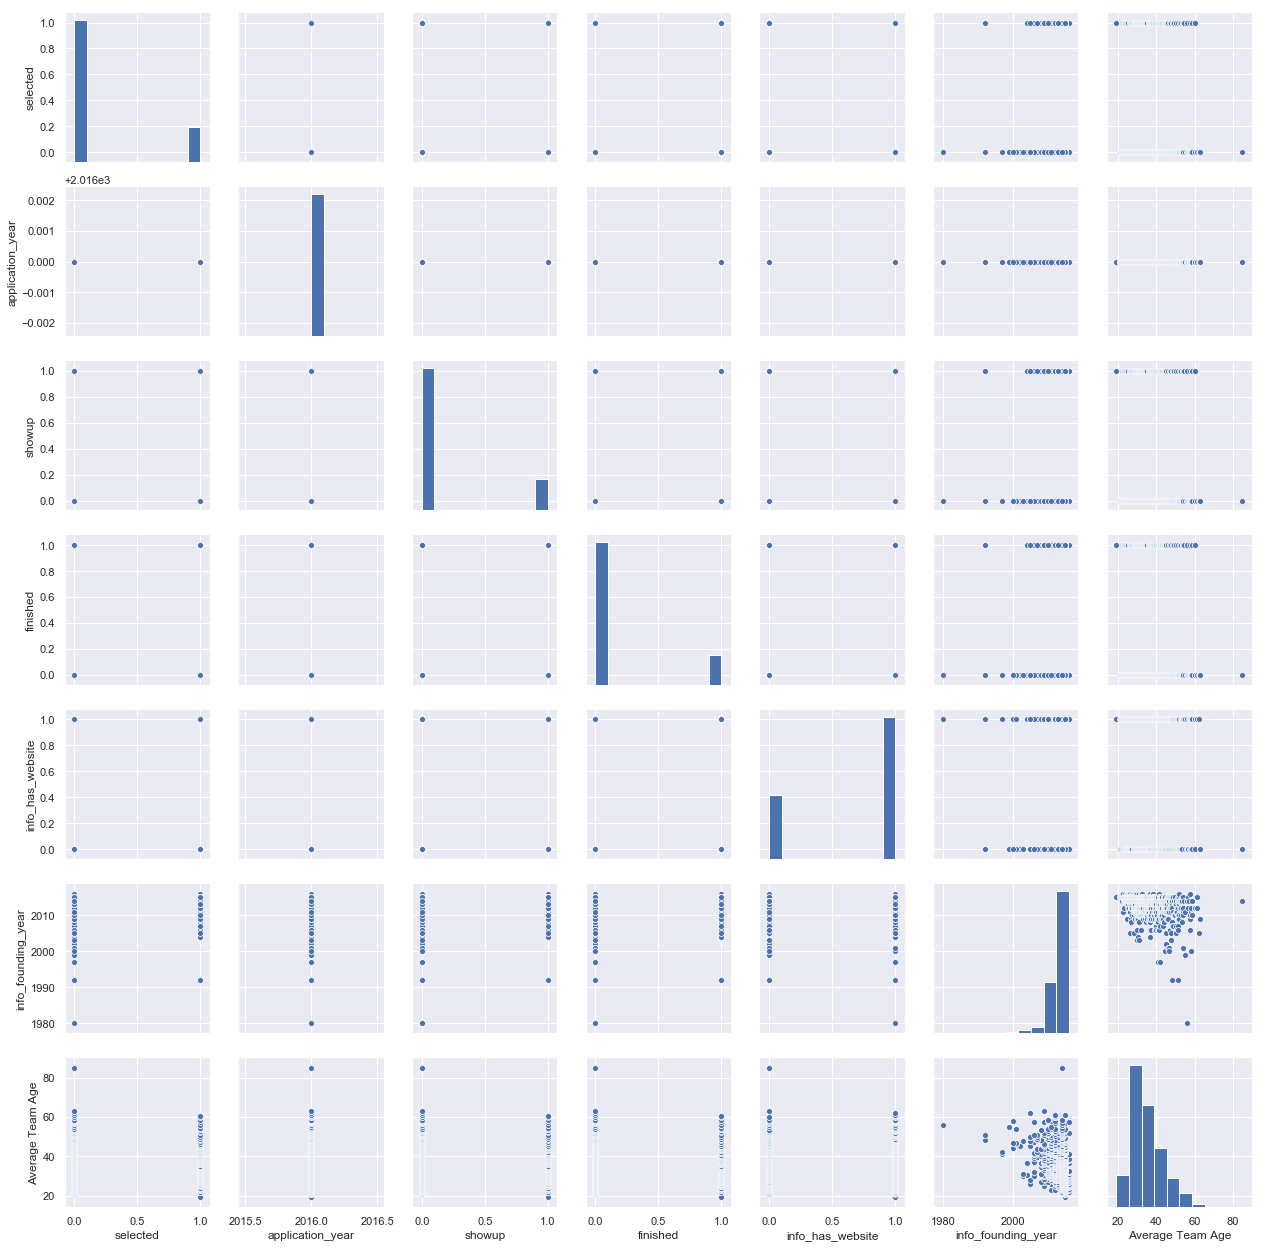

In [66]:
sns.pairplot(dataset)

The above shows a different correlation between the various target variables 

# DATA MODELING

It is ensuring all strings are converted into numeric then train,test model.
It will involve data slicing whereby data is split into train & test set.

In [67]:
# Matrix of features
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, :1].values

In [68]:
X #predictor variables

array([[2016, 1.0, 1.0, ..., 1, 2015.0, 19.0],
       [2016, nan, nan, ..., 0, 2015.0, 20.66666667],
       [2016, 0.0, 0.0, ..., 0, 2015.0, 20.66666667],
       ...,
       [2016, 0.0, 0.0, ..., 1, 2015.0, nan],
       [2016, 0.0, 0.0, ..., 0, 2014.0, nan],
       [2016, 0.0, 0.0, ..., 0, 2011.0, nan]], dtype=object)

In [69]:
y #outcome variables

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [70]:
# Taking care of missing data 
#imputer algorithm which is a better strategy of taking care or discarding missing values in rows & cols.
#it supports categorical data represented as string values or pandas categorical when using the 'most frequent'or'constant strategy'
#use of feature union or column transformer to add features to the reqular features.
#features are parameters used to choose the features for which the mask is constructed.It is by default'missing_only'which returns the imputer mask of the features containing missing values at FIT time.
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="mean")#default is mean i.e the average
imputer2 = Imputer(strategy='most_frequent')#replaces most of frequent values on the specified column
imputer = imputer.fit(X[:,[5,-1]])#
imputer2 = imputer2.fit(X[:, [1,2]])
X[:, [1,2]] = imputer2.transform(X[:, [1,2]])
X[:,[5,-1]] = imputer.transform(X[:,[5,-1]])

C:\Users\faimu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\faimu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [71]:
#Sklearn library will help to build predictive model which contains tools for instance data splitting,pre-processing,
#feature selection and also which technique is suitable for the model in my case its decision tree regression.more so,encoding categorical data
from sklearn.preprocessing import LabelEncoder #categorical data
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# DATA TRAINING & TESTING

In [72]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)#20% means test set will be used testing the whole dataset,
#100-20=80%  which is the entire dataset remaining to be trained.

In [73]:
#Decision Tree Regression which uses the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
predictions = classifier.predict(X_test)

# MODEL EVALUATION

In [75]:
# Model evaluatuion
#Sklearn here is used for acccuracy_score_algorithms
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.00966183574879227
MSE: 0.00966183574879227
RMSE: 0.09829463743659808


In [76]:
#Start model pickle to wrap the model into one file
import joblib
joblib.dump(classifier, 'model.pkl')

['model.pkl']

# MODEL DEPLOYMENT
The model depolyment is by use of flask and postman for emulation or testing the API which is a file for python. 

In [77]:
import pandas as pd
from flask import Flask, request
import joblib
with open('model.pkl', 'rb') as model_file:
    model = joblib.load(model_file)

In [78]:
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    application_year = request.form['application_year']
    showup = request.form['showup']
    finished = request.form['finished']
    venture_region = request.form['venture_region']
    website = request.form['website']
    founding_year = request.form['founding_year']
    age = request.form['age']

    prediction = model.predict(pd.DataFrame([[application_year, showup, finished, venture_region, website, founding_year, age]]))
    return str(prediction)

if __name__=='__main__':
    app.run(port=3000, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\faimu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


for the model to run first dir-list directories
cd-change directions
dir-cd-documents
cd-desktop/-python/PROJ
python api.py.py then give the route port and copy to postman then get all the parameters and run to get the final prediction